In [58]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os

from scipy.stats import norm, skewnorm, gamma

In [2]:
seed = 633

print("[ Using Seed : ", seed, " ]")

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

[ Using Seed :  633  ]


In [3]:
import koopman_probabilistic
import model_objs
import vanilla_benchmark

In [4]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

# Gaussian with time-varying mean and variance

In [294]:
t_vec = np.arange(100000)
mu_vec = 2 * np.sin(1 + np.sin(2 * np.pi * t_vec / 48))
sigma_vec = np.exp(np.sin(2 * np.pi * t_vec / 31) - 1) + 0.5
x = np.random.normal(mu_vec, sigma_vec).reshape(-1, 1)

In [7]:
num_freqs = [2, 2]
num_fourier = 2
model = model_objs.NormalNLL(x_dim=x.shape[1], num_freqs=num_freqs, n=256)
k = koopman_probabilistic.KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
k.find_fourier_omegas(x, hard_code=[48, 31])

tensor([0.1309, 0.2027])

In [8]:
k.fit(x, iterations=100, verbose=True, interval=20, cutoff=0, weight_decay=1e-7, lr_theta=1e-4, lr_omega=0, training_mask=None);

Iteration  0
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  1.4826022330678865
Iteration  1
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.7678132957580811
Iteration  2
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.5232024095018681
Iteration  3
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4656219562290956
Iteration  4
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.46204202965118907
Iteration  5
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackw

Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4222240719496138
Iteration  48
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42186791903131843
Iteration  49
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42154848591566263
Iteration  50
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4212725015829162
Iteration  51
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42101891647641826
Iteration  52
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42077519907349287
Iteration  53
ten

Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41848590134803737
Iteration  96
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41847291013659743
Iteration  97
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41845201505805407
Iteration  98
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41843506732100766
Iteration  99
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.418436554905068
Final loss: 0.418436554905068


In [11]:
predict_through = 400
params = k.predict(predict_through)
mu_hat, sigma_hat = params

In [297]:
path = "./forecasts/synthGaussian1"
np.save(path + "_mu.py", mu_hat)
np.save(path + "_sigma.py", sigma_hat)

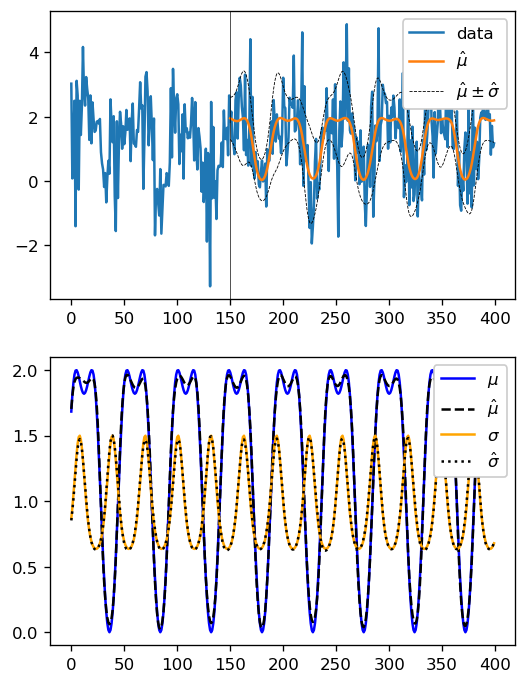

In [296]:
%matplotlib inline
plt.subplots(figsize=(5, 7), dpi=120)
idx = 150
plt.subplot(211)
pt = np.arange(predict_through)
plt.plot(x[:predict_through], ".", label="data", markersize=1.5)
plt.plot(pt[idx:], mu_hat[idx:], label="$\hat \mu$")
plt.plot(pt[idx:], mu_hat[idx:] + sigma_hat[idx:], "--k", linewidth=0.5, label="$\hat \mu \pm \hat \sigma$")
plt.plot(pt[idx:], mu_hat[idx:] - sigma_hat[idx:], "--k", linewidth=0.5)
plt.axvline(idx, color="k", linewidth=0.4)
plt.legend(loc="upper right", framealpha=1)
plt.subplot(212)
plt.plot(mu_vec[:predict_through], "b", label="$\mu$")
plt.plot(mu_hat, "--k", label="$\hat \mu$")
plt.plot(sigma_vec[:predict_through], "orange", label="$\sigma$")
plt.plot(sigma_hat, ":k", label="$\hat \sigma$")
plt.legend(loc="upper right", framealpha=1)


# Gamma with time varying parameters

In [304]:
t_vec = np.arange(100000)
periods = [96, 12]
a_vec = (np.exp(np.sin(2 * np.pi * t_vec / periods[0])) + np.cos(2 * np.pi * t_vec / periods[1])) ** 2 + 4
scale_vec = 0.5 * np.sin(2 * np.pi * t_vec / periods[1]) + np.cos(2 * np.pi * t_vec / periods[0]) + 2
x2 = np.random.gamma(a_vec, scale=scale_vec).reshape(-1, 1)

<IPython.core.display.Javascript object>


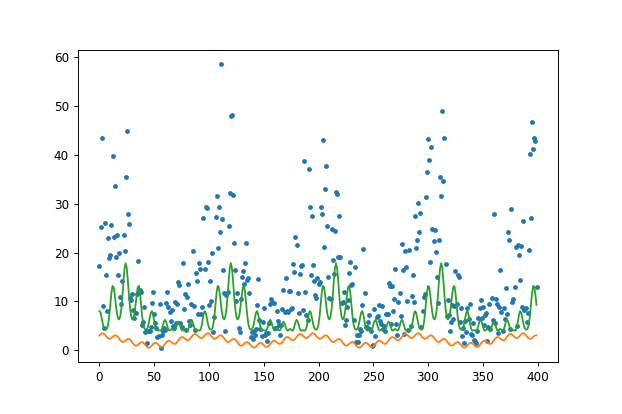

In [279]:
%matplotlib notebook
idx = 400
plt.plot(x2[:idx], ".")
plt.plot(scale_vec[:idx])
plt.plot(a_vec[:idx])

In [280]:
num_freqs = [2, 2]
num_fourier = 2
model = model_objs.GammaNLL(x_dim=x2.shape[1], num_freqs=num_freqs, n=256)
k = koopman_probabilistic.KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
k.find_fourier_omegas(x2, hard_code=periods)

tensor([0.0654, 0.5236])

In [281]:
k.fit(x2, iterations=1000, verbose=True, interval=20, cutoff=0, weight_decay=1e-7, lr_theta=1e-4, lr_omega=0, training_mask=None);

Iteration  0
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  4.793079
Iteration  1
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1294637
Iteration  2
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.0830846
Iteration  3
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.0678186
Iteration  4
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.0561688
Iteration  5
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.045357
Iteration  6
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.0351262
Iteration  7
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 1

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.894532
Iteration  63
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.894145
Iteration  64
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.89377
Iteration  65
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.893406
Iteration  66
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8930535
Iteration  67
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8926969
Iteration  68
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8923159
Iteration  69
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8787446
Iteration  126
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8785937
Iteration  127
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8784938
Iteration  128
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.878364
Iteration  129
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8782215
Iteration  130
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.878154
Iteration  131
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.878023
Iteration  132
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)


Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.87446
Iteration  188
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8743932
Iteration  189
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.87433
Iteration  190
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8743832
Iteration  191
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8743303
Iteration  192
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.87429
Iteration  193
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8742363
Iteration  194
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Los

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8728364
Iteration  250
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8728018
Iteration  251
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8727877
Iteration  252
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8727562
Iteration  253
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8727257
Iteration  254
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.872739
Iteration  255
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.872708
Iteration  256
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.871727
Iteration  312
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8717186
Iteration  313
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8717055
Iteration  314
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.871697
Iteration  315
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.871674
Iteration  316
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8716543
Iteration  317
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8716443
Iteration  318
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)


Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8708568
Iteration  374
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8708372
Iteration  375
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.870835
Iteration  376
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8708057
Iteration  377
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8707778
Iteration  378
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8707693
Iteration  379
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8707576
Iteration  380
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8701131
Iteration  436
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8700974
Iteration  437
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8701031
Iteration  438
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8700833
Iteration  439
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8700778
Iteration  440
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.870057
Iteration  441
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.870063
Iteration  442
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8694997
Iteration  498
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8694875
Iteration  499
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8694694
Iteration  500
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8694706
Iteration  501
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8694482
Iteration  502
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.869455
Iteration  503
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.869422
Iteration  504
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.86899
Iteration  560
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8689969
Iteration  561
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.869021
Iteration  562
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8689947
Iteration  563
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8689475
Iteration  564
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.86898
Iteration  565
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8689413
Iteration  566
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Lo

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8685944
Iteration  622
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8686037
Iteration  623
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8685992
Iteration  624
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868605
Iteration  625
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8686082
Iteration  626
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8685753
Iteration  627
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8685734
Iteration  628
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8682926
Iteration  684
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868298
Iteration  685
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868285
Iteration  686
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868269
Iteration  687
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868297
Iteration  688
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8682745
Iteration  689
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868276
Iteration  690
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Lo

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8680575
Iteration  746
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8680246
Iteration  747
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8680356
Iteration  748
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8680334
Iteration  749
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8679962
Iteration  750
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8680363
Iteration  751
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.868045
Iteration  752
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8678422
Iteration  808
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8678339
Iteration  809
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8678112
Iteration  810
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8678272
Iteration  811
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8678405
Iteration  812
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867814
Iteration  813
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8677876
Iteration  814
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8676734
Iteration  870
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8676574
Iteration  871
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.86766
Iteration  872
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867658
Iteration  873
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867642
Iteration  874
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8676233
Iteration  875
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8676732
Iteration  876
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
L

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675394
Iteration  932
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675513
Iteration  933
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675013
Iteration  934
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675282
Iteration  935
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675237
Iteration  936
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8675256
Iteration  937
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8674872
Iteration  938
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867426
Iteration  994
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8673959
Iteration  995
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867435
Iteration  996
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8674026
Iteration  997
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867424
Iteration  998
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.867419
Iteration  999
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  2.8674157
Final loss: 2.8674157


In [298]:
predict_through = 400
params = k.predict(predict_through)
rate_hat, a_hat = params
scale_hat = 1 / rate_hat
path = "./forecasts/synthGamma1"
np.save(path + "_rate.py", rate_hat)
np.save(path + "_a.py", a_hat)

In [299]:
def gamma_quantiles(rate, a, quantiles):
    T = len(rate)
    quant_preds = np.zeros((T, len(quantiles)))
    for t in range(T):
        rv = gamma(a[t], scale=1/rate[t])
        for j, q in enumerate(quantiles):
            quant_preds[t, j] = rv.ppf(q)
    return quant_preds

In [300]:
quantiles = np.array([30, 60, 85, 98], dtype=np.float32) / 100
quant_preds = gamma_quantiles(rate_hat, a_hat, quantiles=quantiles)

In [301]:
mean_hat = model.mean(params)
std_hat = model.std(params)

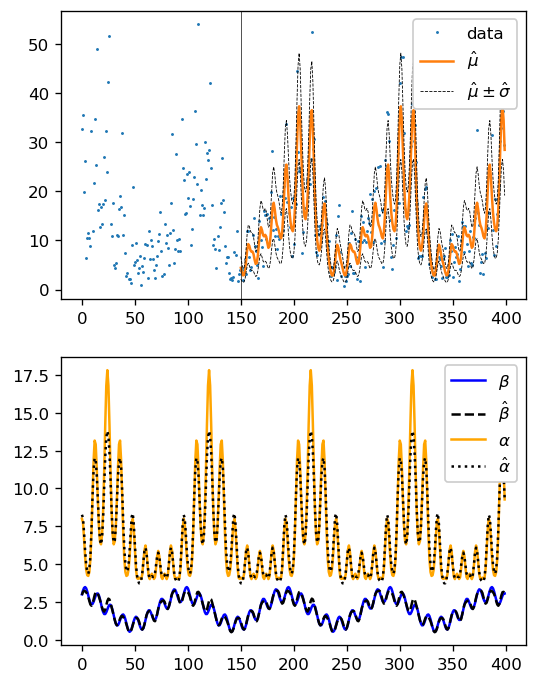

In [305]:
%matplotlib inline
plt.subplots(figsize=(5, 7), dpi=120)
idx = 150
plt.subplot(211)
pt = np.arange(predict_through)
plt.plot(x2[:predict_through], ".", markersize=1.5, label="data")
# colors = [(i / len(quantiles), 0, 0) for i in range(len(quantiles))]
# for j in range(0, len(quantiles), 1):
#     plt.plot(pt[idx:], quant_preds[idx:, j], color=colors[j], linewidth=0.5, label=quantiles[j])
plt.plot(pt[idx:], mean_hat[idx:], label="$\hat \mu$")
plt.plot(pt[idx:], mean_hat[idx:] + std_hat[idx:], "--k", linewidth=0.5, label="$\hat \mu \pm \hat \sigma$")
plt.plot(pt[idx:], mean_hat[idx:] - std_hat[idx:], "--k", linewidth=0.5)
plt.axvline(idx, color="k", linewidth=0.4)
plt.legend(loc="upper right", framealpha=1)
plt.subplot(212)
plt.plot(scale_vec[:predict_through], "b", label="$\\beta$")
plt.plot(scale_hat, "--k", label="$\hat \\beta$")
plt.plot(a_vec[:predict_through], "orange", label="$\\alpha$")
plt.plot(a_hat, ":k", label="$\hat \\alpha$")
plt.legend(loc="upper right", framealpha=1)

# 3D plot

In [210]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


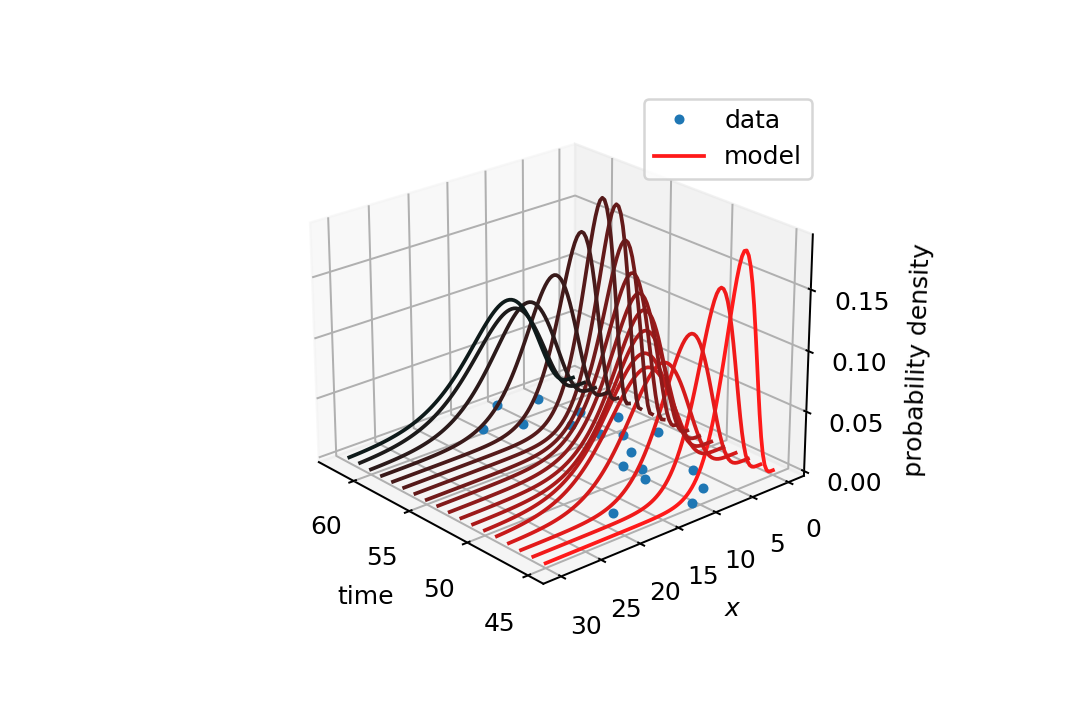

In [233]:
%matplotlib notebook
# (t, x, pdf)
start = 0
end = 18
step = 1
ts = np.arange(start, end, step)
xs = x[ts]
pdfs = []
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')
ax.plot(ts, xs, np.zeros(len(xs)), ".")
for t in ts:
    lins = np.linspace(0, 30, 100)
    pdf = gamma.pdf(lins, a_hat[t], scale=scale_hat[t])
    pdfs.append(pdf)
    ax.plot(t * np.ones(len(lins)), lins, pdf, color=(((end - t) / (end - start)), 0.1, 0.1))
plt.xlabel("time")
plt.ylabel("$x$")
ax.set_zlabel("probability density")
plt.legend(["data", "model"])